<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E4%BD%9C%E4%B8%9A_Task3_%E8%AE%BA%E6%96%87%E4%BB%A3%E7%A0%81%E7%BB%9F%E8%AE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 任务
主题：论文代码统计，统计所有论文出现代码的相关统计；<br>
内容：使用正则表达式统计代码连接、页数和图表数据；<br>
任务完成环境：Google Colab；<br>
[Datawhale原链接](https://github.com/datawhalechina/team-learning-data-mining/blob/master/AcademicTrends/Task3%20%E8%AE%BA%E6%96%87%E4%BB%A3%E7%A0%81%E7%BB%9F%E8%AE%A1.ipynb)

## 数据处理任务
在原始arxiv数据集中作者经常会在论文的comments或abstract字段中给出具体的代码链接，所以我们需要从这些字段里面找出代码的链接。

确定数据出现的位置；<br>
使用正则表达式完成匹配；<br>
完成相关的统计；

## 正则表达式理论知识汇总
正则表达式(regular expression)描述了一种字符串匹配的模式（pattern），可以用来检查一个串是否含有某种子串、将匹配的子串替换或者从某个串中取出符合某个条件的子串等。<br>
**普通字符**<br>

| 字符 | 描述 | 
| ------ | ---------------------------------- | 
| [ABC] | 匹配 [...] 中的所有字符，例如 [aeiou] 匹配字符串 "google runoob taobao" 中所有的 e o u a 字母。 |
| [^ABC] | 匹配除了 [...] 中字符的所有字符，例如 [^aeiou] 匹配字符串 "google runoob taobao" 中除了 e o u a 字母的所有字母。 |
|[A-Z]|[A-Z] 表示一个区间，匹配所有大写字母，[a-z] 表示所有小写字母。|
|.|匹配除换行符（\n、\r）之外的任何单个字符，相等于 [^\n\r]。|
|[\s\S]|匹配所有。\s 是匹配所有空白符，包括换行，\S 非空白符，包括换行。|
|\w|匹配字母、数字、下划线。等价于 [A-Za-z0-9_]|

**非打印字符** <br>
非打印字符也可以是正则表达式的组成部分。下表列出了表示非打印字符的转义序列：

|字符|描述|
|------|-----------------|
|\cx|匹配由x指明的控制字符。例如， \cM 匹配一个 Control-M 或回车符。x 的值必须为 A-Z 或 a-z 之一。否则，将 c 视为一个原义的 'c' 字符。|
|\f|匹配一个换页符。等价于 \x0c 和 \cL。|
|\n|匹配一个换行符。等价于 \x0a 和 \cJ。|
|\r|匹配一个回车符。等价于 \x0d 和 \cM。|
|\s|匹配任何非空白字符。等价于 [^ \f\n\r\t\v]。|
|\t|匹配一个制表符。等价于 \x09 和 \cI。|
|\v|匹配一个垂直制表符。等价于 \x0b 和 \cK。|

**特殊字符**
所谓特殊字符，就是一些有特殊含义的字符，如上面说的 runoo*b 中的 *，简单的说就是表示任何字符串的意思。如果要查找字符串中的 * 符号，则需要对 * 进行转义，即在其前加一个 \: runo\*ob 匹配 runo*ob。

许多元字符要求在试图匹配它们时特别对待。若要匹配这些特殊字符，必须首先使字符"转义"，即，将反斜杠字符\ 放在它们前面。下表列出了正则表达式中的特殊字符：

|特别字符|描述|
|----|------------|
|\$|匹配输入字符串的结尾位置。如果设置了 RegExp 对象的 Multiline 属性，则 $ 也匹配 '\n' 或 '\r'。要匹配 \$ 字符本身，请使用 \\$。|
|( )|标记一个子表达式的开始和结束位置。子表达式可以获取供以后使用。要匹配这些字符，请使用 \\( 和 \\)。|
|\*| 匹配前面的子表达式零次或多次。要匹配 \* 字符，请使用 \\*。|
|+|匹配前面的子表达式一次或多次。要匹配 + 字符，请使用 \\+|
|.|匹配除换行符 \n 之外的任何单字符。要匹配 . ，请使用 \\. 。|
|[|标记一个中括号表达式的开始。要匹配 [，请使用 \\[。|
|?|匹配前面的子表达式零次或一次，或指明一个非贪婪限定符。要匹配 ? 字符，请使用 \\?。|

|^|匹配输入字符串的开始位置，除非在方括号表达式中使用，当该符号在方括号表达式中使用时，表示不接受该方括号表达式中的字符集合。要匹配 ^ 字符本身，请使用 \\^。|
|{|标记限定符表达式的开始。要匹配 {，请使用 \\{。|

**限定符**
限定符用来指定正则表达式的一个给定组件必须要出现多少次才能满足匹配。有 * 或 + 或 ? 或 {n} 或 {n,} 或 {n,m} 共6种。

正则表达式的限定符有：

|字符|描述|
|---|---------|
|\*|匹配前面的子表达式零次或多次。例如，zo* 能匹配 "z" 以及 "zoo"。* 等价于{0,}。|
|+|匹配前面的子表达式一次或多次。例如，'zo+' 能匹配 "zo" 以及 "zoo"，但不能匹配 "z"。+ 等价于 {1,}。|
|?|匹配前面的子表达式零次或一次。例如，"do(es)?" 可以匹配 "do" 、 "does" 中的 "does" 、 "doxy" 中的 "do" 。? 等价于 {0,1}。|
|{n}|n 是一个非负整数。匹配确定的 n 次。例如，'o{2}' 不能匹配 "Bob" 中的 'o'，但是能匹配 "food" 中的两个 o。|
|{n,}|n 是一个非负整数。至少匹配n 次。例如，'o{2,}' 不能匹配 "Bob" 中的 'o'，但能匹配 "foooood" 中的所有 o。'o{1,}' 等价于 'o+'。'o{0,}' 则等价于 'o*'。|
|{n,m}|m 和 n 均为非负整数，其中n <= m。最少匹配 n 次且最多匹配 m 次。例如，"o{1,3}" 将匹配 "fooooood" 中的前三个 o。'o{0,1}' 等价于 'o?'。请注意在逗号和两个数之间不能有空格。|





## 数据加载到Colab上
1.复制在google drive上的数据集 <br>
2.使用unzip解压arxiv.zip

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/') #挂载google drive 加载数据集


Mounted at /content/gdrive/


In [2]:
!cp -f  /content/gdrive/MyDrive/Colab\ Notebooks/arxiv.zip  /content/ 

In [3]:
!unzip -o /content/arxiv.zip  #解压数据集

Archive:  /content/arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


## 统计论文页数
1.参看数据可发现，论文pages和figures的数值在 comments特征下。
首先读取commnets特征。<br>
2.此外不是所有comments特征下都有pages和figures的信息，需要注意。

In [4]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [13]:

def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', ['id', 'abstract', 'categories', 'comments'])

## 对pages进行抽取：

In [14]:
# 使用正则表达式匹配，XX pages
data['pages'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]* pages', str(x)))


In [15]:
data.head()

,id,abstract,categories,comments,pages
0,0704.0001,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",[37 pages]
1,0704.0002,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,To appear in Graphs and Combinatorics,[]
2,0704.0003,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures",[23 pages]
3,0704.0004,We show that a determinant of Stirling cycle...,math.CO,11 pages,[11 pages]
4,0704.0005,In this paper we show how to compute the $\L...,math.CA math.FA,None,[]


In [16]:
# 筛选出有pages的论文
data = data[data['pages'].apply(len) > 0]

In [17]:
data.head()

,id,abstract,categories,comments,pages
0,0704.0001,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",[37 pages]
2,0704.0003,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures",[23 pages]
3,0704.0004,We show that a determinant of Stirling cycle...,math.CO,11 pages,[11 pages]
5,0704.0006,We study the two-particle wave function of p...,cond-mat.mes-hall,"6 pages, 4 figures, accepted by PRA",[6 pages]
6,0704.0007,A rather non-standard quantum representation...,gr-qc,"16 pages, no figures. Typos corrected to match...",[16 pages]


In [18]:
# 由于匹配得到的是一个list，如['19 pages']，需要进行转换
data['pages'] = data['pages'].apply(lambda x: int(x[0].replace(' pages', '')))

In [20]:
data.head()

,id,abstract,categories,comments,pages
0,0704.0001,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",37
2,0704.0003,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures",23
3,0704.0004,We show that a determinant of Stirling cycle...,math.CO,11 pages,11
5,0704.0006,We study the two-particle wave function of p...,cond-mat.mes-hall,"6 pages, 4 figures, accepted by PRA",6
6,0704.0007,A rather non-standard quantum representation...,gr-qc,"16 pages, no figures. Typos corrected to match...",16



对pages进行统计，统计结果如下：论文平均的页数为17页，75%的论文在22页以内，最长的论文有11232页。

In [22]:
data['pages'].describe().astype(int)

count    1089180
mean          17
std           22
min            1
25%            8
50%           13
75%           22
max        11232
Name: pages, dtype: int64

In [23]:
# 选择主要类别
data['categories'] = data['categories'].apply(lambda x: x.split(' ')[0])
data['categories'] = data['categories'].apply(lambda x: x.split('.')[0])
data['categories']

0            hep-ph
2           physics
3              math
5          cond-mat
6             gr-qc
             ...   
1796906    supr-con
1796907    supr-con
1796908    supr-con
1796909    supr-con
1796910    supr-con
Name: categories, Length: 1089180, dtype: object

In [ ]:
# #只是个测试
# data2.loc[data2['pages'] > 20 ]

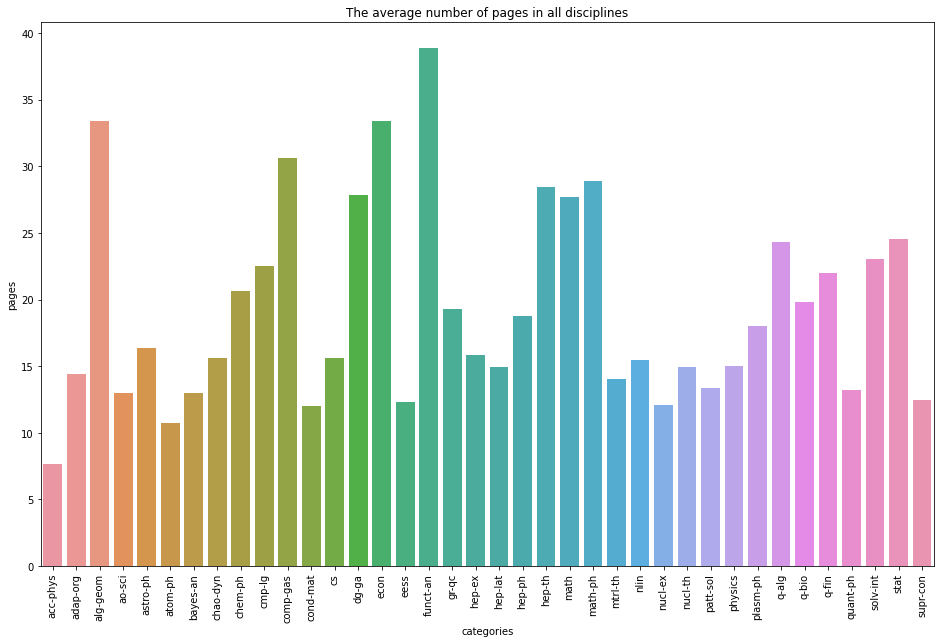

In [78]:

# data.groupby(['categories'])['pages'].mean()
data_pages_mean = data.groupby(['categories']).agg({'pages':'mean'}).reset_index()
plt.figure(figsize=(16, 10))
# data_figures_mean = data.groupby(['categories'])['figures'].mean().reset_index()
sns.barplot(x=data_pages_mean['categories'], y=data_pages_mean['pages'],data=data_pages_mean,)
plt.title('The average number of pages in all disciplines') 
plt.xticks(rotation=90)
plt.show()

## 接下来对论文图表个数进行抽取：

In [46]:
data['figures'] = data['comments'].apply(lambda x: re.findall('[1-9][0-9]* figures', str(x)))
data = data[data['figures'].apply(len) > 0]
#data.loc[data['figures']> 0)] # 等价于上一句
data['figures'] = data['figures'].apply(lambda x: float(x[0].replace(' figures', '')))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
data

,id,abstract,categories,comments,pages,figures
0,0704.0001,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",37,15.0
2,0704.0003,The evolution of Earth-Moon system is descri...,physics,"23 pages, 3 figures",23,3.0
5,0704.0006,We study the two-particle wave function of p...,cond-mat,"6 pages, 4 figures, accepted by PRA",6,4.0
9,0704.0010,Partial cubes are isometric subgraphs of hyp...,math,"36 pages, 17 figures",36,17.0
15,0704.0016,"In this work, we evaluate the lifetimes of t...",hep-ph,"17 pages, 3 figures and 1 table",17,3.0
...,...,...,...,...,...,...
1796880,supr-con/9512003,The nature of the resistive transition for a...,supr-con,8 pages + 6 figures,8,6.0
1796885,supr-con/9604001,"The magnetic field distribution, the magneti...",supr-con,LaTeX file ( 22 pages & 7 figures ); the requi...,22,7.0
1796890,supr-con/9606002,The electronic structure of vortices in a ty...,supr-con,"4 pages, REVTeX, 3 figures available upon request",4,3.0
1796894,supr-con/9607003,The flux flow regime of high-T$_{\rm c}$ sam...,supr-con,3 pages. 4 figures upon request,3,4.0


In [ ]:
data_figures_mean 

## 可视化每类论文的平均图片数

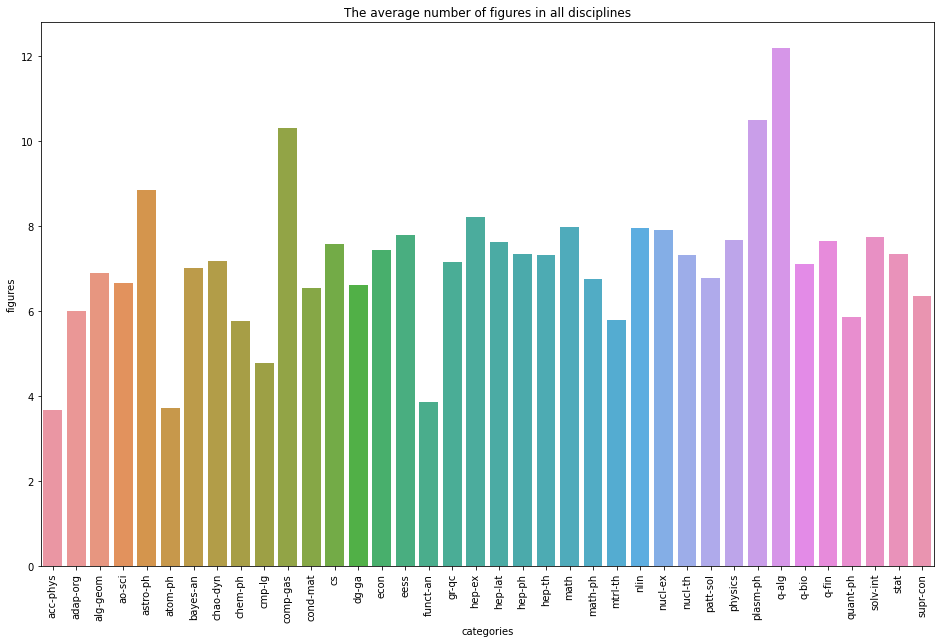

In [73]:
# 每类论文的平均图片数
plt.figure(figsize=(16, 10))
data_figures_mean = data.groupby(['categories'])['figures'].mean().reset_index()
sns.barplot(x=data_figures_mean['categories'], y=data_figures_mean['figures'],data=data_figures_mean)
plt.title('The average number of figures in all disciplines')
plt.xticks(rotation=90)
plt.show()

## 对论文的代码链接进行提取，先抽取github链接：

In [79]:
# 筛选包含github的论文
data_with_code = data[(data.comments.str.contains('github')==True)|(data.abstract.str.contains('github')==True)]
data_with_code

,id,abstract,categories,comments,pages,figures
253172,1103.5904,Solar tomography has progressed rapidly in r...,astro-ph,"21 pages, 6 figures, 5 tables",21,6.0
254226,1104.0672,We describe a hybrid Fourier/direct space co...,astro-ph,"10 pages, 6 figures. Submitted to Astronomy an...",10,6.0
296182,1110.4876,REBOUND is a new multi-purpose N-body code w...,astro-ph,"10 pages, 9 figures, accepted by A&A, source c...",10,9.0
300298,1111.2062,This article proposes a way to improve the p...,physics,"10 pages, 7 figures. CODE: https://github.com/...",10,7.0
311500,1112.5945,The interaction of distinct units in physica...,physics,"Preprint. 24 pages, 4 figures, 2 tables. Sourc...",24,4.0
...,...,...,...,...,...,...
1381266,2011.08518,Sequence-based place recognition methods for...,cs,"9 pages, 6 figures, 2 tables",9,6.0
1381310,2011.08562,The target identification in brain-computer ...,cs,"12 pages, 6 figures",12,6.0
1381509,2011.08761,"In this paper, we study the problem of imagi...",eess,"10 pages, 2 figures, to be published in STACOM...",10,2.0
1381606,2011.08858,We derive a simple prescription for includin...,astro-ph,14 pages; 6 figures; 3 appendices,14,6.0


In [80]:
# 合并comments 和 abstract
data_with_code['text'] = data_with_code['abstract'].fillna('') + data_with_code['comments'].fillna('')
data_with_code

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,abstract,categories,comments,pages,figures,text
253172,1103.5904,Solar tomography has progressed rapidly in r...,astro-ph,"21 pages, 6 figures, 5 tables",21,6.0,Solar tomography has progressed rapidly in r...
254226,1104.0672,We describe a hybrid Fourier/direct space co...,astro-ph,"10 pages, 6 figures. Submitted to Astronomy an...",10,6.0,We describe a hybrid Fourier/direct space co...
296182,1110.4876,REBOUND is a new multi-purpose N-body code w...,astro-ph,"10 pages, 9 figures, accepted by A&A, source c...",10,9.0,REBOUND is a new multi-purpose N-body code w...
300298,1111.2062,This article proposes a way to improve the p...,physics,"10 pages, 7 figures. CODE: https://github.com/...",10,7.0,This article proposes a way to improve the p...
311500,1112.5945,The interaction of distinct units in physica...,physics,"Preprint. 24 pages, 4 figures, 2 tables. Sourc...",24,4.0,The interaction of distinct units in physica...
...,...,...,...,...,...,...,...
1381266,2011.08518,Sequence-based place recognition methods for...,cs,"9 pages, 6 figures, 2 tables",9,6.0,Sequence-based place recognition methods for...
1381310,2011.08562,The target identification in brain-computer ...,cs,"12 pages, 6 figures",12,6.0,The target identification in brain-computer ...
1381509,2011.08761,"In this paper, we study the problem of imagi...",eess,"10 pages, 2 figures, to be published in STACOM...",10,2.0,"In this paper, we study the problem of imagi..."
1381606,2011.08858,We derive a simple prescription for includin...,astro-ph,14 pages; 6 figures; 3 appendices,14,6.0,We derive a simple prescription for includin...


In [81]:
# 使用正则表达式匹配论文
pattern = '[a-zA-Z]+://github[^\s]*'
data_with_code['code_flag'] = data_with_code['text'].str.findall(pattern).apply(len)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
data_with_code

,id,abstract,categories,comments,pages,figures,text,code_flag
253172,1103.5904,Solar tomography has progressed rapidly in r...,astro-ph,"21 pages, 6 figures, 5 tables",21,6.0,Solar tomography has progressed rapidly in r...,0
254226,1104.0672,We describe a hybrid Fourier/direct space co...,astro-ph,"10 pages, 6 figures. Submitted to Astronomy an...",10,6.0,We describe a hybrid Fourier/direct space co...,1
296182,1110.4876,REBOUND is a new multi-purpose N-body code w...,astro-ph,"10 pages, 9 figures, accepted by A&A, source c...",10,9.0,REBOUND is a new multi-purpose N-body code w...,1
300298,1111.2062,This article proposes a way to improve the p...,physics,"10 pages, 7 figures. CODE: https://github.com/...",10,7.0,This article proposes a way to improve the p...,2
311500,1112.5945,The interaction of distinct units in physica...,physics,"Preprint. 24 pages, 4 figures, 2 tables. Sourc...",24,4.0,The interaction of distinct units in physica...,1
...,...,...,...,...,...,...,...,...
1381266,2011.08518,Sequence-based place recognition methods for...,cs,"9 pages, 6 figures, 2 tables",9,6.0,Sequence-based place recognition methods for...,0
1381310,2011.08562,The target identification in brain-computer ...,cs,"12 pages, 6 figures",12,6.0,The target identification in brain-computer ...,1
1381509,2011.08761,"In this paper, we study the problem of imagi...",eess,"10 pages, 2 figures, to be published in STACOM...",10,2.0,"In this paper, we study the problem of imagi...",0
1381606,2011.08858,We derive a simple prescription for includin...,astro-ph,14 pages; 6 figures; 3 appendices,14,6.0,We derive a simple prescription for includin...,1


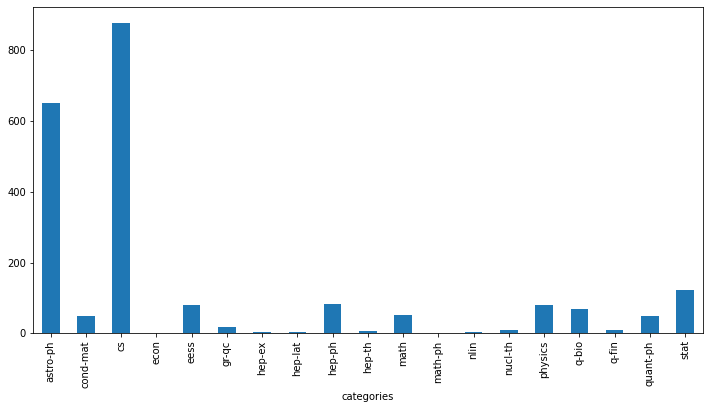

In [83]:
data_with_code.loc[data_with_code['code_flag'] > 0]  ## 有的flag是大于1的，就是说
plt.figure(figsize=(12, 6))
data_with_code.groupby(['categories'])['code_flag'].count().plot(kind='bar')

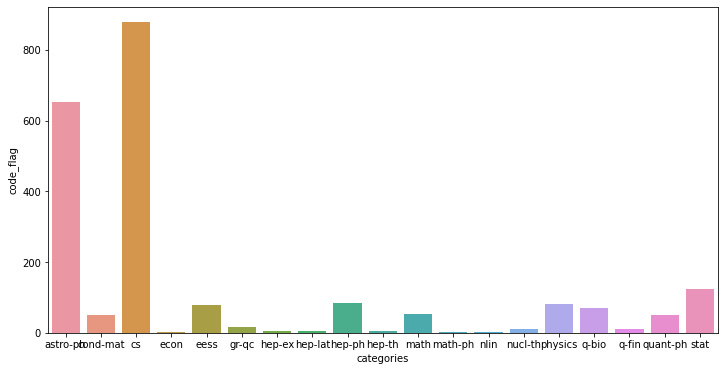

In [92]:
plt.figure(figsize=(12, 6))
data_codes = data_with_code.groupby(['categories'])['code_flag'].count().reset_index()
sns.barplot(x =data_codes['categories'],y= data_codes['code_flag'])
